In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras.applications import VGG16 
from tensorflow.keras.models import Model 
from tensorflow.keras.layers import Dense, Flatten 
import numpy as np 
import matplotlib.pyplot as plt 

In [ ]:
train_dir='C:/Users/Naveen Sai/deep learning/Ex6_dataset/training_set'
datagen=ImageDataGenerator(rescale=1./255,validation_split=0.2)
train_generator=datagen.flow_from_directory(train_dir,target_size=(227,227),batch_size=4,class_mode='binary',subset='training')
validation_generator=datagen.flow_from_directory(train_dir,target_size=(227,227),batch_size=4,class_mode='binary',subset='validation')

Found 640 images belonging to 2 classes.
Found 160 images belonging to 2 classes.


In [5]:
from tensorflow.keras.applications.vgg16 import VGG16,preprocess_input,decode_predictions
model_1=VGG16(weights='imagenet',input_shape=(224,224,3))
model_1.summary()
img_path='C:/Users/K Jyothsna/deep learning/Ex6_dataset/single_prediction/cat_or_dog_1.jpg'
img=tf.keras.preprocessing.image.load_img(img_path,target_size=(224,224,3))
img_array=np.expand_dims(tf.keras.preprocessing.image.img_to_array(img),axis=0)
img_array=preprocess_input(img_array)
prediction=model_1.predict(img_array)
predicted_class=decode_predictions(prediction,top=1)

A local file was found, but it seems to be incomplete or outdated because the auto file hash does not match the original value of 64373286793e3c8b2b4e3219cbf3544b so we will re-download the data.
553467096/553467096 ━━━━━━━━━━━━━━━━━━━━ 1294s 2us/step


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fc1 (Dense)                          │ (None, 4096)                │     102,764,544 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 138,357,544 (527.79 MB)

 Trainable params: 138,357,544 (527.79 MB)

 Non-trainable params: 0 (0.00 B)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 3us/step


In [7]:
print(prediction)

[[8.32675298e-08 3.59870818e-08 2.62806505e-08 7.21218907e-09
  6.40201581e-09 5.59781377e-08 1.11849339e-08 1.68913473e-07
  1.50621091e-07 2.45279583e-08 7.09124990e-08 1.70046320e-07
  1.11576760e-07 4.94375776e-08 1.23970082e-07 1.03662758e-08
  1.55185553e-08 3.68437227e-08 2.79282091e-08 2.06713970e-08
  4.16816004e-09 1.32209941e-08 2.87234894e-08 7.03576930e-08
  2.31511450e-07 1.12601029e-07 1.26293841e-07 4.38539985e-07
  2.83066139e-08 6.34398534e-09 2.05569410e-08 1.71347310e-07
  1.22284973e-07 1.95374206e-08 3.13795105e-08 9.44780520e-09
  1.14265921e-08 6.41067004e-08 1.78830213e-08 5.84961946e-08
  7.91472814e-07 1.36266562e-08 8.85810465e-08 1.30096225e-07
  1.58470428e-08 4.03559284e-08 3.52903413e-07 7.35213746e-07
  4.21144293e-08 7.10302928e-09 1.75015114e-08 1.58320518e-07
  1.46889278e-07 1.16554233e-07 3.54777079e-08 5.75564663e-08
  4.53137190e-08 1.30378375e-08 3.92075794e-09 2.68379665e-08
  4.78555329e-08 6.88284771e-08 2.24540919e-08 6.49008527e-08
  2.7410

In [9]:
print(predicted_class)

[[('n02099712', 'Labrador_retriever', 0.59677684)]]


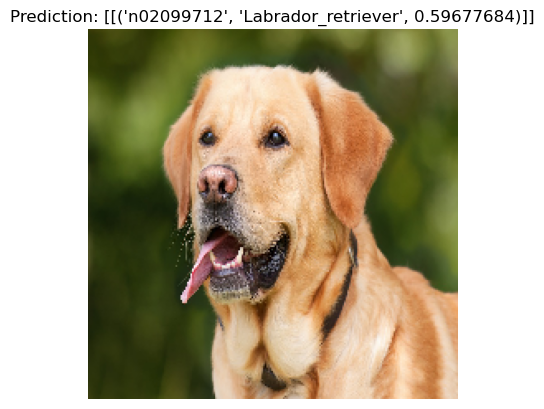

In [11]:
plt.imshow(img)
plt.title(f"Prediction: {predicted_class}")
plt.axis("off")
plt.show()